<a href="https://colab.research.google.com/github/BinarPlatinumChallenge/Sentiment-Analysis/blob/main/NN-LSTM_collabs/4_text_normalization_cleansing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREPARE DATASET**

In [ ]:
# mounting to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download dataset

Raw data traning can be downloaded with this [link](https://drive.google.com/file/d/1RCHGfn9JJyyReAh8PIIoF8Ch0H3miP0u/view)

Raw data set hates speech, file kamus alay dan stopwords can be downloaded in this [link](https://drive.google.com/drive/folders/1qm50pKAnzGGw9gtk--lmwR758aZOVish) 

Hate speech dataset with sentiment label from predict API can be dowloaded by this [link](https://drive.google.com/file/d/1yhXqgjSjB6KmzshrpFaHsT6-NgJb2n9c/view?usp=sharing)

In [ ]:
# read raw dataset used for training the model from google drive, eliminated null and duplicated data

import pandas as pd  # Libraries to read and analyze data frame
df = pd.read_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/dataset/train_preprocess.tsv.txt', delimiter='\t', header=0, names=['tweet','sentimen'])
df = df.dropna()
df = df.drop_duplicates(ignore_index=True)

In [ ]:
# Raw data set hates speech
df_HS = pd.read_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/dataset/data.csv', encoding='latin-1')
df_HS = df_HS.dropna()
df_HS = df_HS.drop_duplicates(ignore_index=True)

In [ ]:
df_HS

# **TEXT NORMAIZATION / CLEANSING**

In [ ]:
# Install libraries for stopwords

!pip install nltk
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 4.6 MB/s eta 0:00:00


In [ ]:
# import library to handle stopwords using NLTK

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# import library to handle stopwords using sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
sastrawi_stop_words = stop_factory.get_stop_words()
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# merge stopword dictionary from NLTK, sastrawi, and raw file "stopwordbahasa.csv"
# add {'ya','yg','ga','yuk','dah','sih','gue','nya','nih'} in stopwords dict set
# eliminated word ['tidak'] from stopwords dict set to avoid changing the meaning of the sentence 

stopword_dict = pd.read_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/dataset/stopwordbahasa.csv', header=None, names=['stopword'], encoding='latin-1')
stopword_dict = list(stopword_dict['stopword']) + sastrawi_stop_words + stop_words + ['ya','yg','ga','yuk','dah','sih','gue','nya','nih','makan','makanan','bandung']
stopword_dict = list(dict.fromkeys(stopword_dict))
stopword_dict = filter(lambda word: word !='tidak', stopword_dict)
stopword_dict = list(stopword_dict)
print(len(stopword_dict))

785


## CLEANSING DATA SET

In [ ]:
# Cleansing dataset using RegEx
# text cleansing definition

import re 
def lowercase(text): #1 lowecase
  text = text.strip() 
  return text.lower()

def remove_unnecessary_char(text): #2
  text = re.sub('\\+n', ' ', text) # remove every new line
  text = re.sub('\n'," ",text) # remove every single new line
  text = re.sub('\\+', ' ', text) # remomove unessessary character
  text = re.sub(r'\brt\b','', text) # r'\b...\b to remove certain word, only at the beginning or end of the word for 'rt' 
  text = re.sub(r'\buser\b','', text) # r'\b...\b to remove certain word, only at the beginning or end of the word for 'user'
  text = re.sub(r'\burl\b','', text) # remove url
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # remomove unessessary character 
  text = re.sub(':', ' ', text) # remomove special character 
  text = re.sub(';', ' ', text) 
  text = re.sub('  +', ' ', text) 
  text = re.sub(r'pic.twitter.com.[\w]+', '', text) # remomove unessessary character 
  text = re.sub(r'[^\x00-\x7F]+',' ', text)  
  text = re.sub(r'‚Ä¶', '', text)  
  to_delete = ['hypertext', 'transfer', 'protocol', 'over', 'secure', 'socket', 'layer', 'dtype', 'tweet', 'name', 'object'
                 ,'twitter','com', 'pic', ' ya '] # delete another unessessary words
  for word in to_delete: 
      text = re.sub(word,'', text) # remove extra space
      text = re.sub(word.upper(),' ',text)
  return text

def remove_nonaplhanumeric(text): #3
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def remove_emoticon_byte(text): #4
    text = text.replace("\\", " ")
    text = re.sub(r'\bx..', ' ', text)
    text = re.sub(' n ', ' ', text)
    return text

def remove_early_space(text):  #5
    if text[0] == ' ':
        return text[1:]
    else:
        return text

def remove_number(text): #6
    text = ''.join([i for i in text if not i.isdigit()])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

# handle special word "tidak" --> "tidak_" to avoid changing the meaning of the sentance

def handleTidak(text): #7
    words = text.split(' ')
    text = ' '.join(['tidak_' if words[i] == 'tidak' else words[i] for i in range(len(words))])
    text = text.strip()
    text = text.replace('tidak_ ','tidak_')
    return text

# text normalization 

def normalize_alay(text): #8
    alay_dict = pd.read_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/dataset/new_kamusalay.csv', names=['original', 'replacement'], encoding='latin-1')
    alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
    normalize_text = ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
    return normalize_text

def remove_stopword(text): #9
    text = ' '.join(['' if word in stopword_dict else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def stemming(text): #10
    return stemmer.stem(text)


In [ ]:
# text cleansing process

def cleanse_text(text):
    text = lowercase(text) #1
    text = remove_unnecessary_char(text) #2
    text = remove_nonaplhanumeric(text) #3
    text = remove_emoticon_byte(text) #4
    text = remove_early_space(text) #5
    text = remove_number(text) #6
    text = normalize_alay(text) #8
    text = remove_stopword(text) #9
    text = stemming(text) #10
    text = handleTidak(text) #7
    return text

In [ ]:
# # check cleansing result

text = '[][{ rt 1996 + ? xfo url seperti unboxing harta karun makanan makan rouserin yang hilang, tapi dia yang tidak MARAH usah malah makan di user\\ warung ini dimiliki... gak bau nya'
text = cleanse_text(text)
text

'unboxing harta karun rouserin hilang tidak_marah warung milik tidak_bau'

In [ ]:
# applied data cleansing process into dataset "hates speech komentar twitter"

df_HS['cleaned_tweet'] = df_HS.Tweet.apply(cleanse_text)

In [ ]:
# applied data cleansing process into dataset  "train_preprocess"

df['cleaned_tweet'] = df.tweet.apply(cleanse_text)

KeyboardInterrupt: ignored

In [ ]:
df.head()

,tweet,sentimen,cleaned_tweet
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k mmbri hujjah partai diwlh ...
1,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nyaman ...
2,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia unboxing paket barang bagus tet...
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning ajar...
4,"makanan beragam , harga makanan di food stall ...",positive,makan agam harga makan food stall kasir suasan...


## **Saving clean data set to Gdrive** 

In [ ]:
# save clean dataset to google drive : training data set

df.to_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/dataset/train_cleaned_preprocess.csv', header = True)
df.head()

,tweet,sentimen,cleaned_tweet
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k mmbri hujjah partai diwlh ...
1,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra nyaman sofa lan...
2,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia unboxing paket barang bagus tet...
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning ajar...
4,"makanan beragam , harga makanan di food stall ...",positive,makan agam harga makan food stall kasir suasan...


In [ ]:
# save clean dataset to google drive : data set hate speech

df.to_csv('/content/drive/MyDrive/CHALLENGE_PLATINUM/HS_sentiment_cleaned.csv', header = True)
df.head()

## Cheking cleansing result


In [ ]:
# checking the frequency of words = dataset "hates speech komentar twitter"

new_df_data = df_data.cleaned_tweet.str.split(expand=True).stack().value_counts().reset_index()
new_df_data.columns = ['Word', 'Frequency'] 
new_df_data.head(10)

,Word,Frequency
0,indonesia,1652
1,presiden,1475
2,orang,1380
3,jokowi,1095
4,islam,868
5,agama,820
6,locator,803
7,resource,803
8,uniform,800
9,partai,752


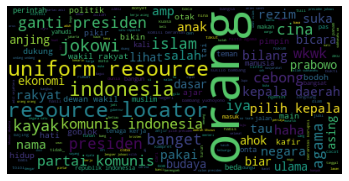

In [ ]:
# checking the frequency of words using matplotlib and WordCloud = dataset "hates speech komentar twitter"

import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(df_data['cleaned_tweet'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()